# Analisis exploratorio de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data =  pd.read_csv("/workspaces/Gupir11-machine-learning/data/raw/internal-link.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
f"Total de filas {data.shape[0]} y total de Columnas {data.shape[1]}"

'Total de filas 48895 y total de Columnas 16'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Resumen info de data

Podemos ver que la tabla incluye datos enteros 7, datos float 3 y 6 de tipo object
tambien podemos ver qye tenemos columnas con algunos datos nulos pero los que tienen mas datos nulos son: last_review y reviews_per_month.


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Comentario
Al usar el decribe nos ayuda a saber que datos son caracteristicas categoricas como por ejemplo: id, host_id y availability_365.
tabien encontramos datos de caracteristica numerica que son: latitude, longitude,price,minimum_nights,number_of_reviews,reviews_per_month ycalculated_host_listings_count
que estas nos pueden ayudar a filtrar busqueda o intereses ademas de darnos opciones matematicas que nos interesen 

In [6]:
data.duplicated() , data['id'].duplicated().sum()

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 48890    False
 48891    False
 48892    False
 48893    False
 48894    False
 Length: 48895, dtype: bool,
 np.int64(0))

si revisamos con duplicated no encontramos ningun dato repetido en todo el dataframe, esto indica que no hace falta eliminar sobrantes, igualmente se verifica buscando por id para validar.   

In [7]:
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


Eliminamos las columnas id, name,host name, last review, reviews per month, ya que son columnas que no necesitamos ahora mismo y no son cuantificables para lo que buscamos, esto nos deja data con 11 columnas

In [29]:
columnas_numericas = ['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365']
columnas_categoricas = ['neighbourhood_group', 'neighbourhood', 'room_type']


## Análisis de variables univariante

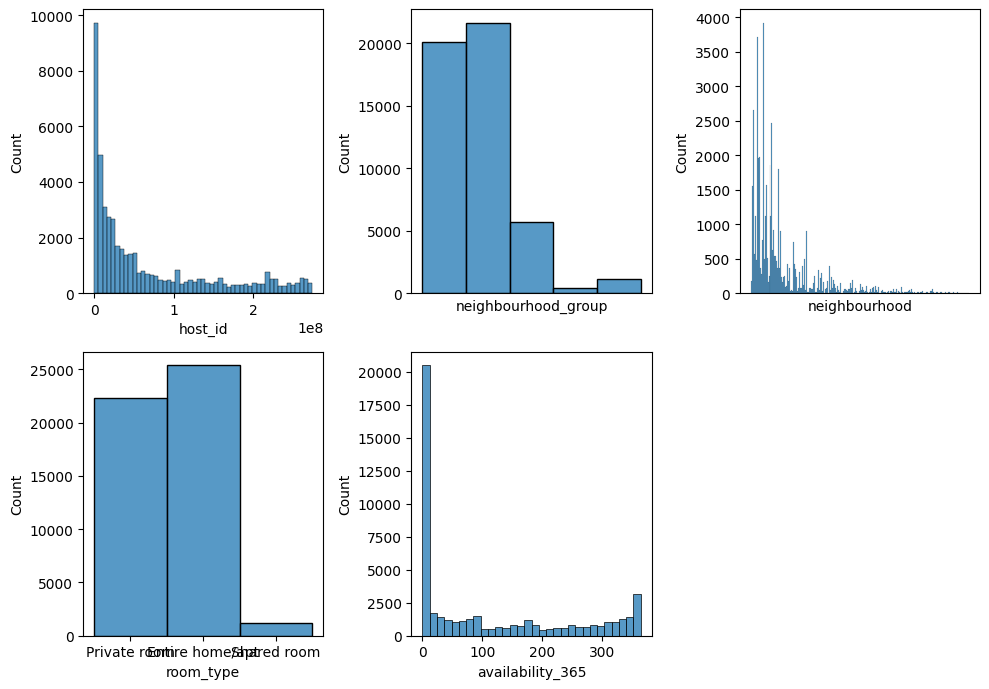

In [9]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])
plt.tight_layout()
plt.show()

## Análisis sobre variables numéricas

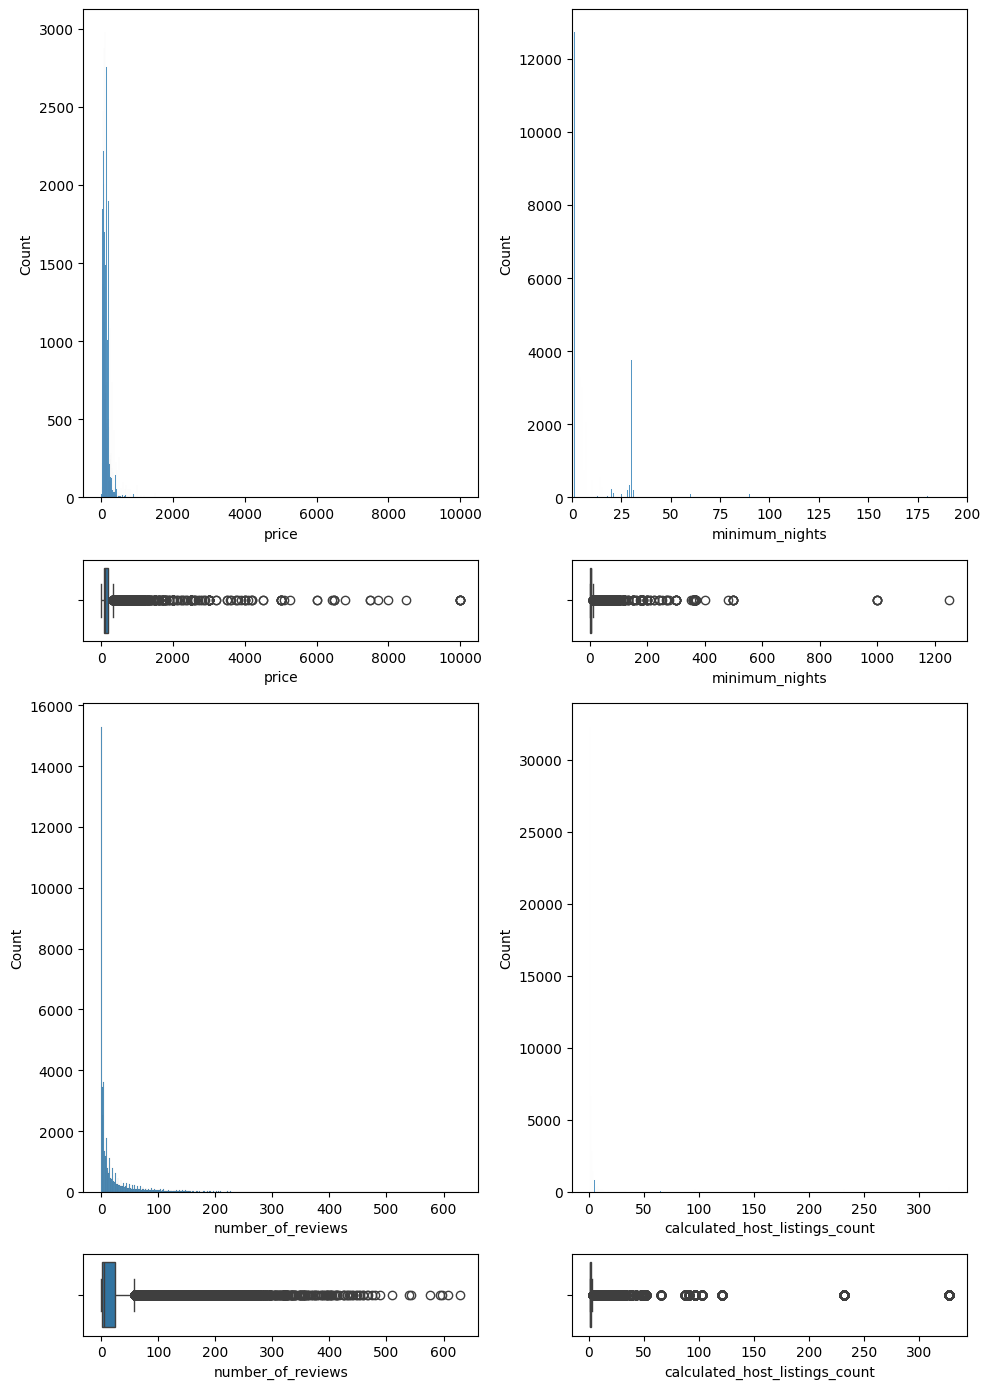

In [10]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data =data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data =data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data =data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Análisis de variables multivariante

### Análisis Numérico-Númerico

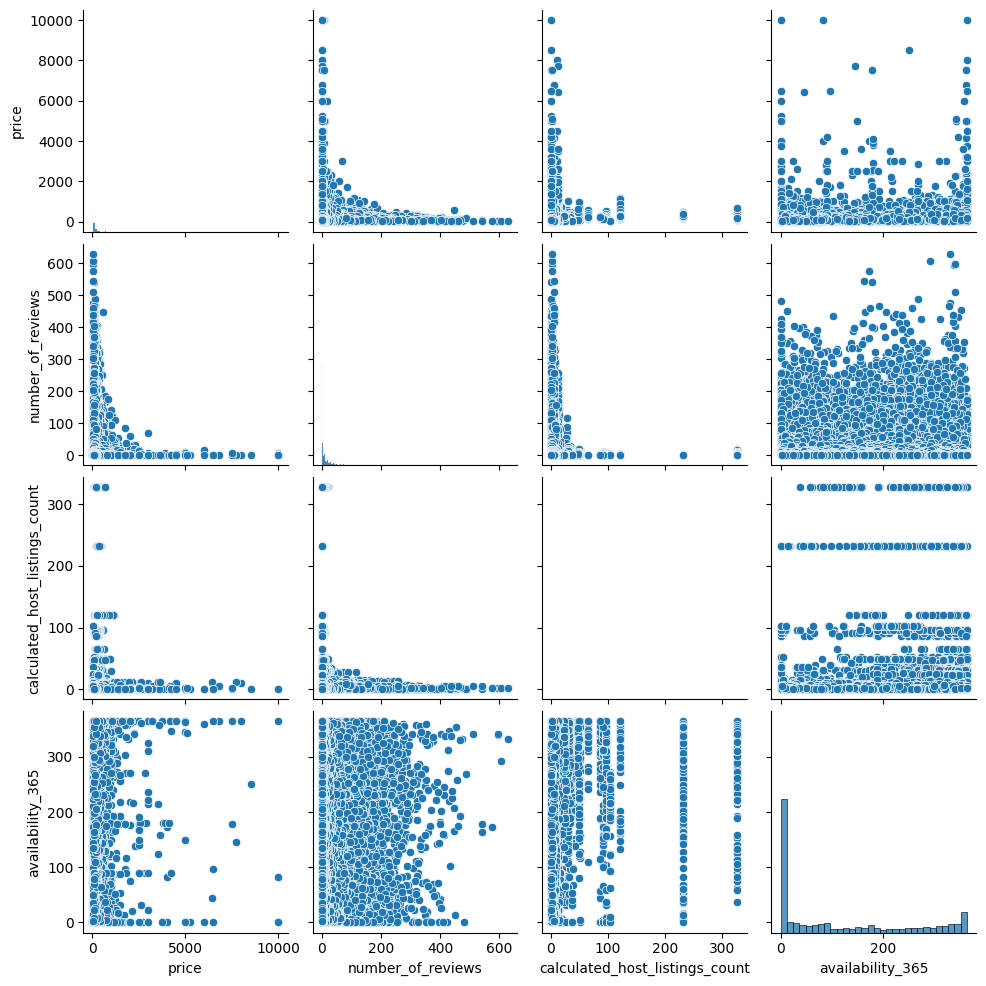

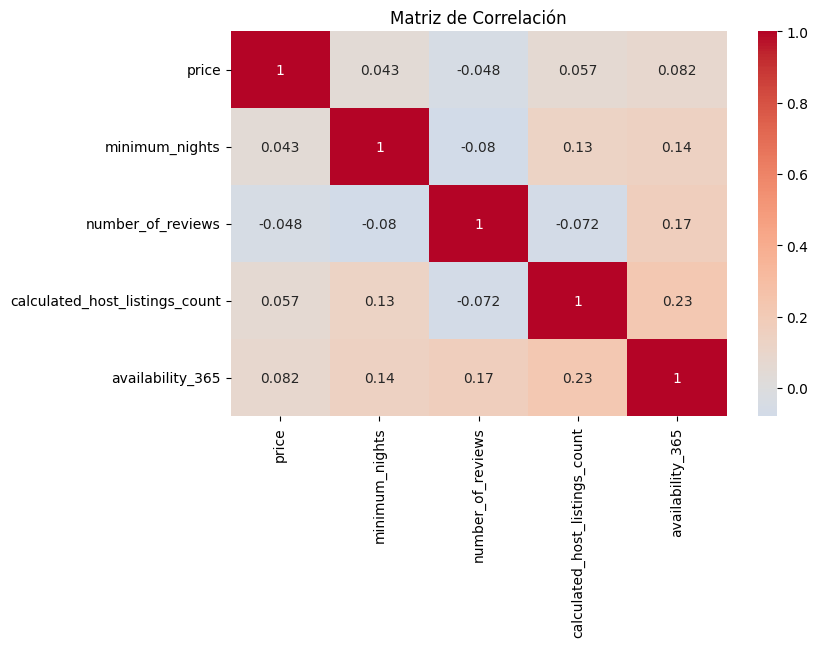

In [11]:
sns.pairplot(data[['price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])
plt.show()

# Correlación
plt.figure(figsize=(8,5))
sns.heatmap(data[columnas_numericas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

### observacion
Las variables numéricas del dataset no están fuertemente relacionadas entre sí. Para entender mejor factores como el precio, será más útil analizar variables categóricas (por ejemplo: tipo de habitación, zona geográfica, vecindario) y relaciones mixtas categórico-numéricas.
ademas tambn notamos una Correlación positiva débil en los anfitriones con más propiedades tienden a tener más días disponibles al año. 

### Análisis categórico-categórico

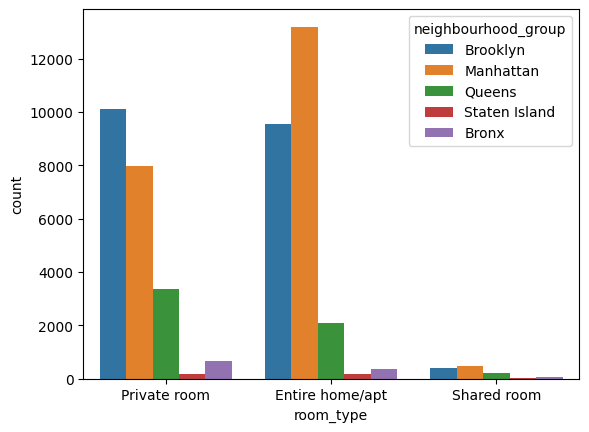

In [12]:
sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")
plt.show()

### observacion 
Manhattan y Brooklyn concentran la mayor parte del mercado de Airbnb, especialmente con alojamientos completos y privados.
Las habitaciones completas son más comunes donde la demanda turística es alta (Manhattan).
La oferta de habitaciones compartidas es mínima, lo cual sugiere baja demanda o baja rentabilidad.

## Relación Categórico-Numérico

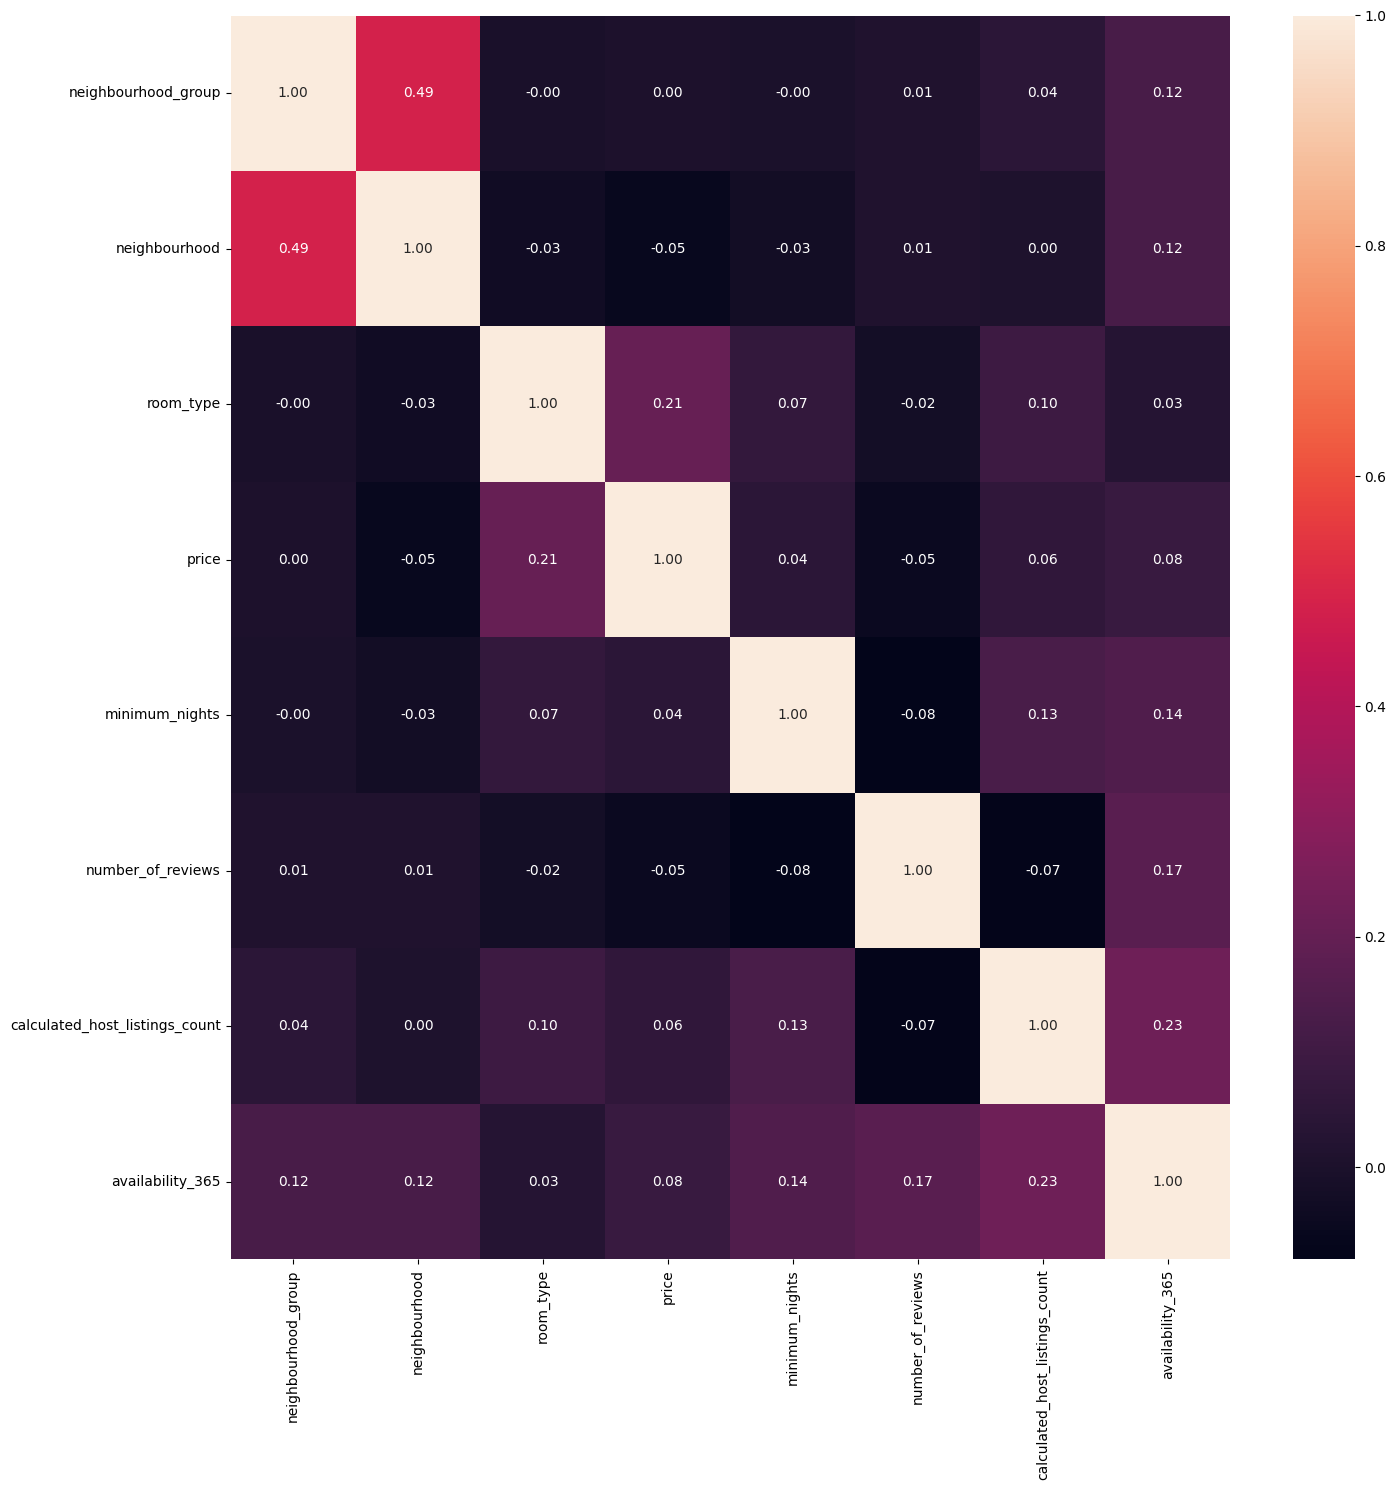

In [13]:
data["room_type"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

### conclusion 
Observamos que no tiene relaciones lineales fuertes. Las variables numéricas y categóricas están poco correlacionadas entre sí, por lo que el análisis deberá ir más allá de correlaciones y enfocarse en comparaciones categóricas (ej: precio por zona, tipo de habitación, etc.) y visualizaciones más profundas, no solo estadísticas numéricas.

igualmente destacamos el (0.23) entre calculated_host_listings_count y availability_365 que puede insinuar que los hosts con más propiedades tienden a tener más días disponibles en promedio 

## Outliers: Visualización


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
neighbourhood_group,48895.0,7.869107e-01,8.443860e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
neighbourhood,48895.0,2.988878e+01,3.467663e+01,0.00000,7.500000e+00,1.900000e+01,3.700000e+01,2.200000e+02
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
room_type,48895.0,5.671132e-01,5.412489e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02


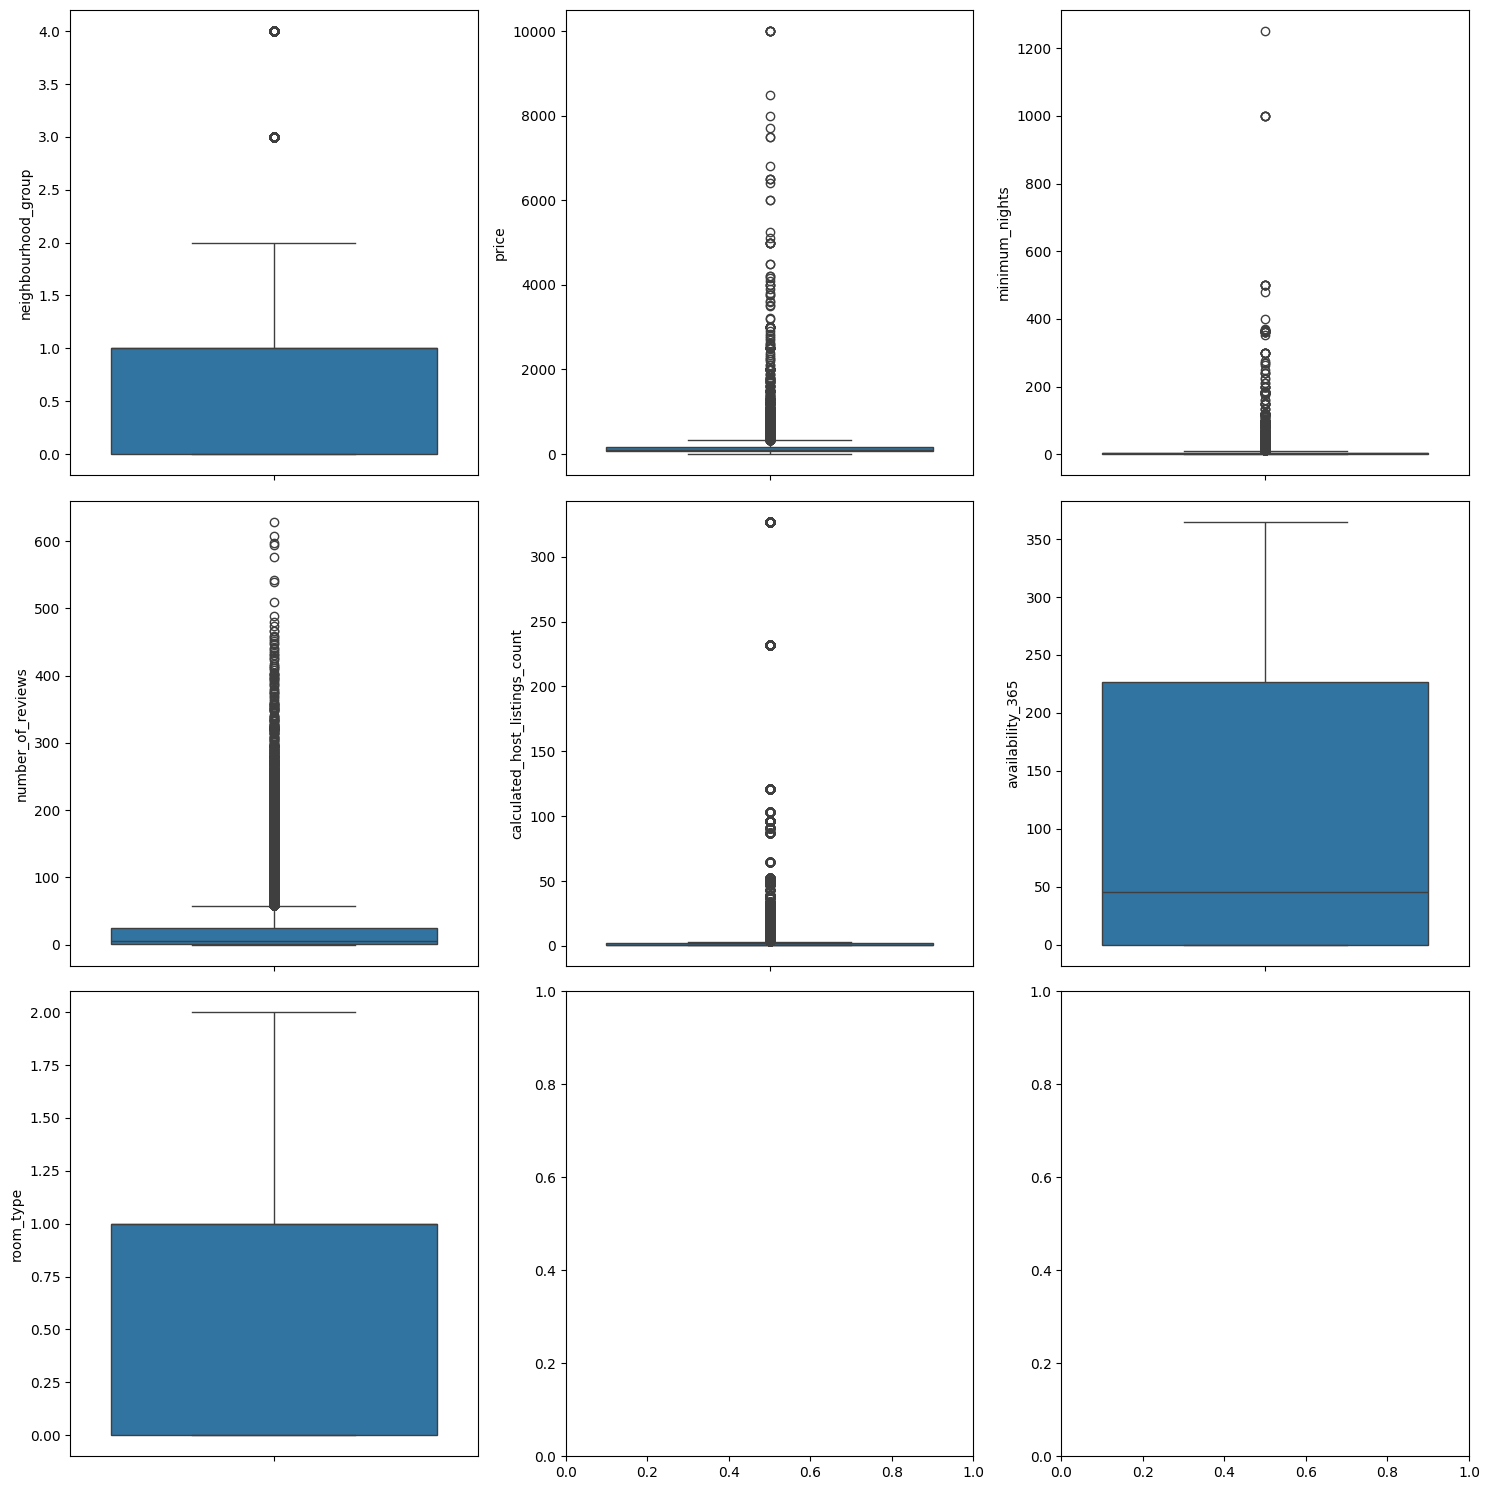

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(ax=axes[0, 0], data=data, y="neighbourhood_group")
sns.boxplot(ax=axes[0, 1], data=data, y="price")
sns.boxplot(ax=axes[0, 2], data=data, y="minimum_nights")
sns.boxplot(ax=axes[1, 0], data=data, y="number_of_reviews")
sns.boxplot(ax=axes[1, 1], data=data, y="calculated_host_listings_count")
sns.boxplot(ax=axes[1, 2], data=data, y="availability_365")
sns.boxplot(ax=axes[2, 0], data=data, y="room_type")

plt.tight_layout()

plt.show()

### busqueda de outliers por columna


In [16]:
price_stats = data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 334.0, límite inferior: 0, rango intercuartílico: 106.0'

In [18]:
data[data["price"] > 334]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,60278,1,14,40.74623,-73.99530,1,375,180,5,1,180
85,74303,0,32,40.69723,-73.99268,1,800,1,25,1,7
103,93790,1,11,40.73096,-74.00319,1,500,4,46,2,243
114,72062,1,19,40.72540,-73.98157,1,350,2,7,4,298
121,119588,0,10,40.66499,-73.97925,1,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...,...
48758,73211393,2,25,40.75508,-73.93258,1,350,2,0,1,364
48833,29741813,1,43,40.70605,-74.01042,1,475,2,0,1,64
48839,274079964,0,73,40.59866,-73.95661,0,800,1,0,1,23
48842,224171371,1,14,40.75204,-74.00292,1,350,1,0,1,9


### observacion
en este caso vemos que hay 2972 precios que pasan el limite estadistico, que equivale a un 6% de la data, en este momento no beneficia eliminarlos ya que nuestra idea principal
es saber si un host con mas propiedades tiende a subir o mantener precios con respecto al resto de host con una propiedad, si eliminamos estos datos podriamos perder datos ligados 
a propiedades de lujo que pueda tener un host. 

## Análisis de valores faltantes

In [19]:
data.isnull().sum().sort_values(ascending=False) / len(data)

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### Observasion
Como podemos apreciar en el resultado no tenemos ningun dato con nulos, lo cual nos indica que no hay q rellenar o cambiar. 

## Scaling - Escalado de valores

### Escalado Mínimo-Máximo

In [20]:
num_variables = ['price', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count', 'availability_365']
X = data[num_variables]

scaler = MinMaxScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X), index=data.index, columns=num_variables)

X_minmax

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.0149,0.000000,0.014308,0.015337,1.000000
1,0.0225,0.000000,0.071542,0.003067,0.972603
2,0.0150,0.001601,0.000000,0.000000,1.000000
3,0.0089,0.000000,0.429253,0.000000,0.531507
4,0.0080,0.007206,0.014308,0.000000,0.000000
...,...,...,...,...,...
48890,0.0070,0.000801,0.000000,0.003067,0.024658
48891,0.0040,0.002402,0.000000,0.003067,0.098630
48892,0.0115,0.007206,0.000000,0.000000,0.073973
48893,0.0055,0.000000,0.000000,0.015337,0.005479


### relacion ¿Los anfitriones con más propiedades cobran más o menos por noche?

In [21]:
corr = X_minmax['calculated_host_listings_count'].corr(X_minmax['price'])
f"Correlación entre nº de propiedades del host y precio: {corr:.3f}"

'Correlación entre nº de propiedades del host y precio: 0.057'

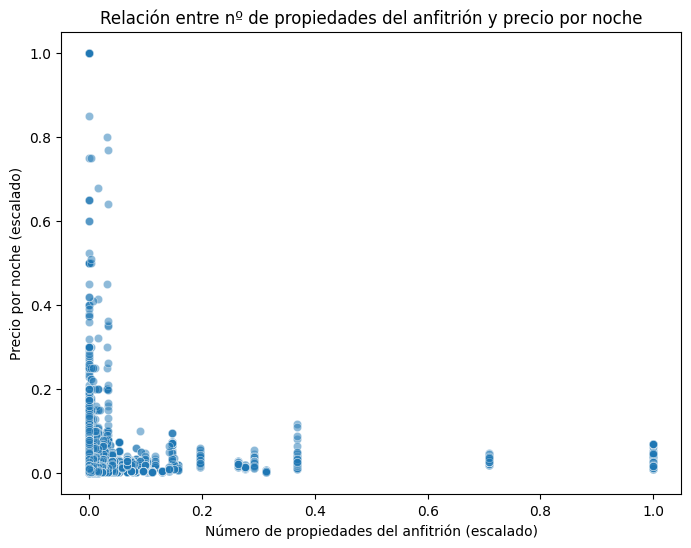

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_minmax, x='calculated_host_listings_count', y='price', alpha=0.5)
plt.title('Relación entre nº de propiedades del anfitrión y precio por noche')
plt.xlabel('Número de propiedades del anfitrión (escalado)')
plt.ylabel('Precio por noche (escalado)')
plt.show()

El gráfico de dispersión y la baja correlación (r = 0.057) indican que no existe una relación lineal significativa entre el número de propiedades de un anfitrión y el precio promedio por noche.
La mayoría de los anfitriones tienen una sola propiedad y los que poseen muchas no muestran un patrón de precios distinto.
Por lo tanto, el precio no parece depender de cuántas propiedades tiene el anfitrión, sino probablemente de otros factores como la ubicación o el tipo de alojamiento.

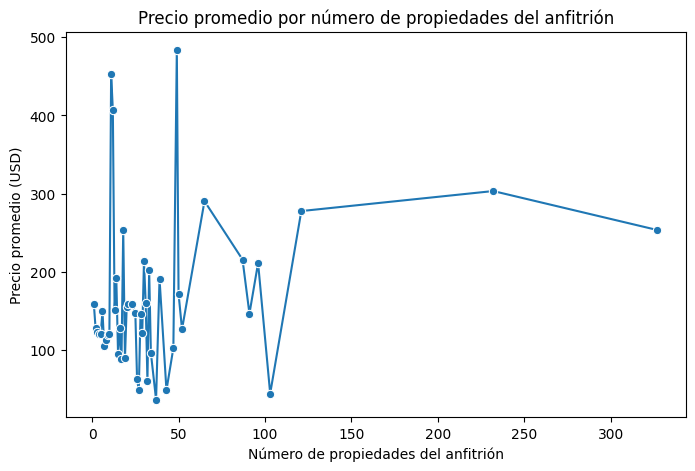

In [23]:
price_by_host_count = data.groupby('calculated_host_listings_count')['price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=price_by_host_count, x='calculated_host_listings_count', y='price', marker='o')
plt.title('Precio promedio por número de propiedades del anfitrión')
plt.xlabel('Número de propiedades del anfitrión')
plt.ylabel('Precio promedio (USD)')
plt.show()

El gráfico confirma que no existe una relación clara ni fuerte entre el número de propiedades de un anfitrión y el precio promedio por noche.
Aunque algunos anfitriones con muchas propiedades parecen cobrar precios algo mayores, la tendencia no es consistente.
En general, el precio depende más de la ubicación, tipo de alojamiento y características específicas del anuncio que del tamaño del portafolio del anfitrión.

In [32]:

df_encoded = pd.get_dummies(data, columns=columnas_categoricas, drop_first=True)
df_encoded.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_213,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_1,room_type_2
0,2787,40.64749,-73.97237,149,1,9,6,365,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2845,40.75362,-73.98377,225,1,45,2,355,True,False,...,False,False,False,False,False,False,False,False,True,False
2,4632,40.80902,-73.94190,150,3,0,1,365,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4869,40.68514,-73.95976,89,1,270,1,194,False,False,...,False,False,False,False,False,False,False,False,True,False
4,7192,40.79851,-73.94399,80,10,9,1,0,True,False,...,False,False,False,False,False,False,False,False,True,False


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Columns: 234 entries, host_id to room_type_2
dtypes: bool(226), float64(2), int64(6)
memory usage: 13.5 MB
